In [1]:
!wget -nc http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2024-11-04 08:45:37--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  13.7MB/s    in 31s     

2024-11-04 08:46:08 (15.2 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
df = pd.read_json('reviews_Electronics_5.json.gz', lines=True)

# Select relevant columns
df = df[['reviewText', 'overall']]

# Label encoding
df['overall'] = df['overall'].apply(lambda x: 1 if x > 3 else 0)

In [8]:
# Text cleaning
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['reviewText'] = df['reviewText'].apply(clean_text)

In [11]:
# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviewText'])
y = df['overall']


In [12]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8808718971814894
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65     66478
           1       0.90      0.96      0.93    271360

    accuracy                           0.88    337838
   macro avg       0.84      0.76      0.79    337838
weighted avg       0.87      0.88      0.87    337838

Confusion Matrix:
[[ 37283  29195]
 [ 11051 260309]]


In [ ]:
# 0 -> negative
# 1 -> positive

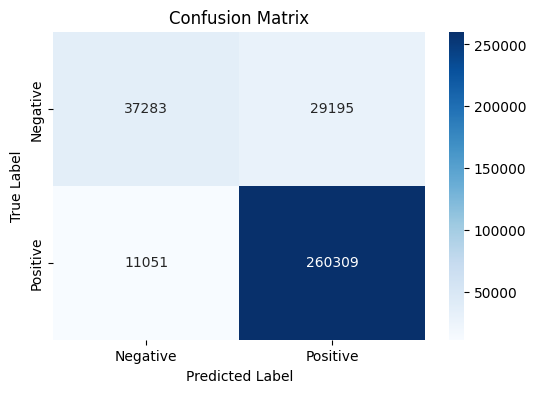

<Figure size 1000x500 with 0 Axes>

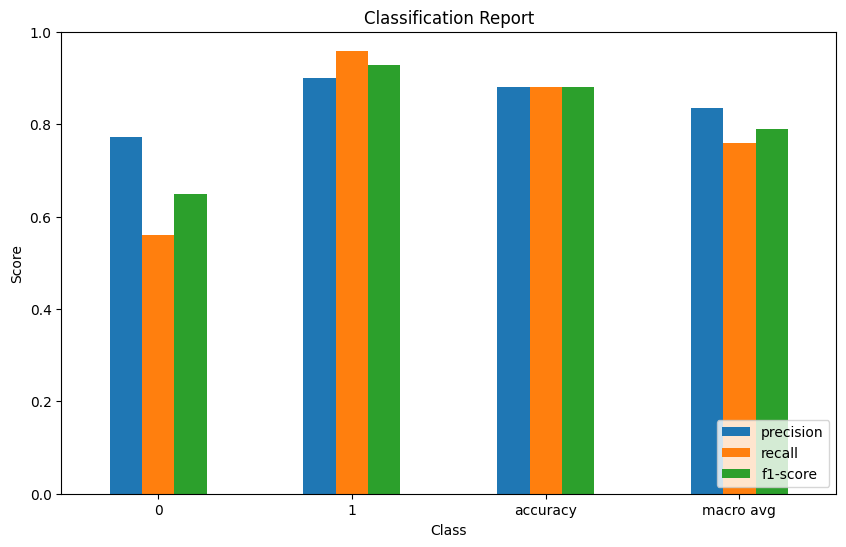

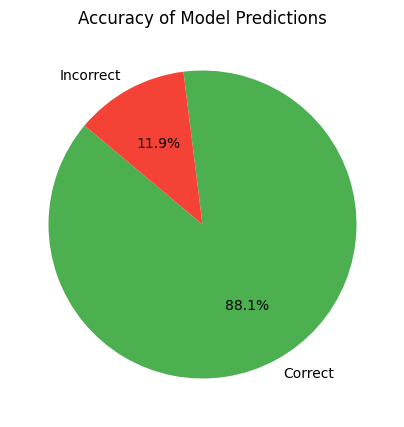

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Classification Report Bar Plot
def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).T
    df_report = df_report[:-1]  # Exclude the 'accuracy' row

    plt.figure(figsize=(10, 5))
    df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
    plt.title("Classification Report")
    plt.xlabel("Class")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.show()

# Pie Chart for Accuracy
def plot_accuracy_pie(y_true, y_pred):
    correct = (y_true == y_pred).sum()
    incorrect = len(y_true) - correct
    plt.figure(figsize=(5, 5))
    plt.pie([correct, incorrect], labels=["Correct", "Incorrect"], autopct="%1.1f%%", startangle=140, colors=["#4CAF50", "#F44336"])
    plt.title("Accuracy of Model Predictions")
    plt.show()

# Usage
plot_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)
plot_accuracy_pie(y_test, y_pred)
